Assumtiptions:


$x_1,...,x_n$ i.i.d. on $[0,1]$ latent variables. Later we can try changing the distribution.

$y_k=f(x_k)+\epsilon_k$ with $\epsilon_k$ i.i.d and Gaussian with variance $\sigma$ and f a function to be estimated, for now $f(x)=x$

$k(,)$ a kernel and $\phi$ a link function with range $[0,1]$ so that $\phi(k(x,y)$ is a parameter for a Bernoulli variable

$a_{x,x_i}=Bernoulli(\phi(k(x,x_i))$- probability of edge between $x$ and $x_i$

$y_1,...,y_n$ and $a_{x,i}$ are observed. Later we may assume that $a_{i,j}$ are observed as well.



We try to estimate $f(x)$ with $\hat{f}(x)=\frac{\sum_{i}a_{x,i}y_i}{\sum_{i}a_{x,i}}$



In [51]:
import numpy as np
from matplotlib import pyplot as plt

Kernel zoo: We introduce various kernels to see how the choice of a kernel effects the estimator

In [2]:
def rectangular(x,y,h):
    s=0
    if np.abs(x-y)<h:
        s=1/2
    return(s)

def gaussian(x,y,h):
    return np.exp(-(x-y)**2/h)

def laplacian(x,y,h):
    return np.exp(-(np.abs(x-y))/h)

def triangular(x,y,h):
    s=0
    if np.abs(x-y)<h:
        s=1-np.abs(x-y)/h
    return(s)

def Epanechnikov(x,y,h):
    s=0
    if np.abs(x-y)<h:
        s=15*(1-(x-y)**2/h**2)/16
    return(s)

Function zoo: We introduce various functions f to see how well our estimator performs on different functions

In [3]:
def sin_2pi(x):
    return np.sin(2*np.pi*x)

def square(x):
    return x**2

def exp(x):
    return np.exp(x)

def linear(x):
    return x

This is a function that approximates $\frac{\int f(z)k(x,z)dz}{\int k(x,z)dz}$

In [4]:
def integral(x,f,k,m,h):
    partition=np.linspace(0,1,num=m)
    
    numerator=0
    denominator=0
    
    
    for z in partition:
        numerator=numerator+f(z)*k(x,z,h)
        denominator=denominator+k(x,z,h)
    
    return(numerator/denominator)
    

Test0 is the case where the point x for which we try to estimate $f(x)$ is not random. This is the simplest case:
the variables $a_{x,x_i}$ are still i.i.d, this would not be the case if x was random. Here, we can easily prove some results regarding the concentration of the variables $\sum_{i}a_{x,x_i}$ and $\sum_{i}y_ia_{x,x_i}$, whenever the function $f$ is bounded. We will run some simulations which we can later compare to the theoretical results.    In the simulations we will compare our proposed estimator with the NW estimator. Further, we may consult the literature on the NW estimator to give general high probability bounds on the convergence of our proposed estimator.



Test1 is the case where the point x for which we try to estimate $f(x)$ is random, i.i.d. with the data points. The bounded difference/ Talagrand inequalities while still applicable do not give conclusive results about the convergence of the estimator in this case. There might be some modifications which improve on this inequalities.



Test2 is the case in which we try to estimate $f(x^*_1),..f(x^*_m)$ where $x^*_1,..,x^*_m$ are new i.i.d. points with uniform distribution. We can average both over training set and test set to see how well the estimator performs. For now this problem is not considered from a theoretical viewpoint.

In [5]:
def test0(n,sigma,kernel,width,x,functions):
    data=np.random.uniform(size=n)
    noise=np.random.normal(size=n)
     
    
    outputs=[]
    for f in functions:
         
        num=0
        denom=0
        NW_num=0
        NW_denom=0
        y_observations=f(data)+sigma*noise
        
        for j in range(len(data)):
            parameter=kernel(x,data[j],width)
            a=np.random.binomial(n=1,p=parameter)
            num=num+a*y_observations[j]
            denom=denom+a
            NW_num=NW_num+parameter*y_observations[j]
            NW_denom=NW_denom+parameter
            
        outputs.append(np.array([num,denom,num/denom,NW_num,NW_denom,NW_num/NW_denom]).copy())
        
        
    
        
    return(outputs)


def test1(n,sigma,kernel,width,functions):
    data=np.random.uniform(size=n)
    noise=np.random.normal(size=n)
    

    x_new=np.random.uniform()
    
    for f in functions:
        num=0
        denom=0
        NW_num=0
        NW_denom=0
        
        y_observations=f(data)+sigma*noise
        
        for j in range(len(data)):
            parameter=kernel(x_new,data[j],width)
            a=np.random.binomial(n=1,p=parameter)
            num=num+a*y_observations[j]
            denom=denom+a
            NW_num=NW_num+parameter*y_observations[j]
            NW_denom=NW_denom+parameter

        outputs.append(np.array([num,denom,num/denom,NW_num,NW_denom,NW_num/NW_denom]).copy())
    
    return(outputs)

def test2(n,m,sigma,kernel,width,f):
    data=np.random.uniform(size=n)
    noise=np.random.normal(size=n)
    y_observations=f(data)+sigma*noise
    
    x_new=np.random.uniform()
    
    num_list=[]
    denom_list=[]
    prediction_list=[]
    difference_list=[]
    NW_num_list=[]
    NW_denom_list=[]


    for x in x_new:
        num=0
        denom=0
        NW_num=0
        NW_denom=0
        for j in range(len(data)):
            parameter=kernel(x,data[j],width)
            a=np.random.binomial(n=1,p=parameter)
            num=num+a*y_observations[j]
            denom=denom+a
            NW_num=NW_num+parameter*y_observations[j]
            NW_denom=NW_denom+parameter
    
        num_list.append(num)
        denom_list.append(denom)
        prediction_list.append(num/denom)
        difference_list.append(np.abs(x-num/denom))
        NW_num_list.append(NW_num)
        NW_denom_list.append(NW_denom)
        
    return(num_list,denom_list,prediction_list,difference_list,NW_num_list,NW_denom_list)

0.49772382146208566

We compare $\hat{f}_{GNW}(x)$, $\hat{f}_{NW}(x)$ and $\frac{\int f(z)k(x,z)dz}{\int k(x,z)dz}$

In [16]:
testing_points=np.linspace(0,1,num=100)

true_f_linear=linear(testing_points)
true_f_square=square(testing_points)
true_f_sin=sin_2pi(testing_points)
true_f_exp=exp(testing_points)

functions=[linear,square,sin_2pi,exp]

NW_rect_linear=[]
NW_rect_square=[]
NW_rect_sin=[]
NW_rect_exp=[]

GNW_rect_linear=[]
GNW_rect_square=[]
GNW_rect_sin=[]
GNW_rect_exp=[]

NW_triangular_linear=[]
NW_triangular_square=[]
NW_triangular_sin=[]
NW_triangular_exp=[]

GNW_triangular_linear=[]
GNW_triangular_square=[]
GNW_triangular_sin=[]
GNW_triangular_exp=[]

NW_Epanechnikov_linear=[]
NW_Epanechnikov_square=[]
NW_Epanechnikov_sin=[]
NW_Epanechnikov_exp=[]

GNW_Epanechnikov_linear=[]
GNW_Epanechnikov_square=[]
GNW_Epanechnikov_sin=[]
GNW_Epanechnikov_exp=[]

NW_gaus_linear=[]
NW_gaus_square=[]
NW_gaus_sin=[]
NW_gaus_exp=[]

GNW_gaus_linear=[]
GNW_gaus_square=[]
GNW_gaus_sin=[]
GNW_gaus_exp=[]

NW_lap_linear=[]
NW_lap_square=[]
NW_lap_sin=[]
NW_lap_exp=[]

GNW_lap_linear=[]
GNW_lap_square=[]
GNW_lap_sin=[]
GNW_lap_exp=[]

In [17]:
# Rectangular kernel

for testing_point in testing_points:
    t_0=test0(n=50000,sigma=0.1,kernel=rectangular,width=0.11,x=testing_point,functions=functions)
    
    NW_rect_linear.append(t_0[0][5])
    NW_rect_square.append(t_0[1][5])
    NW_rect_sin.append(t_0[2][5])
    NW_rect_exp.append(t_0[3][5])
    
    GNW_rect_linear.append(t_0[0][2])
    GNW_rect_square.append(t_0[1][2])
    GNW_rect_sin.append(t_0[2][2])
    GNW_rect_exp.append(t_0[3][2])

# Triangular kernel    

for testing_point in testing_points:
    t_0=test0(n=50000,sigma=0.1,kernel=triangular,width=0.11,x=testing_point,functions=functions)
    
    NW_triangular_linear.append(t_0[0][5])
    NW_triangular_square.append(t_0[1][5])
    NW_triangular_sin.append(t_0[2][5])
    NW_triangular_exp.append(t_0[3][5])
    
    GNW_triangular_linear.append(t_0[0][2])
    GNW_triangular_square.append(t_0[1][2])
    GNW_triangular_sin.append(t_0[2][2])
    GNW_triangular_exp.append(t_0[3][2])

# Epanechnikov kernel

for testing_point in testing_points:
    t_0=test0(n=50000,sigma=0.1,kernel=Epanechnikov,width=0.11,x=testing_point,functions=functions)
    
    NW_Epanechnikov_linear.append(t_0[0][5])
    NW_Epanechnikov_square.append(t_0[1][5])
    NW_Epanechnikov_sin.append(t_0[2][5])
    NW_Epanechnikov_exp.append(t_0[3][5])

    GNW_Epanechnikov_linear.append(t_0[0][2])
    GNW_Epanechnikov_square.append(t_0[1][2])
    GNW_Epanechnikov_sin.append(t_0[2][2])
    GNW_Epanechnikov_exp.append(t_0[3][2])
    
# Gaussian kernel


for testing_point in testing_points:
    t_0=test0(n=50000,sigma=0.1,kernel=gaussian,width=0.11,x=testing_point,functions=functions)
    
    NW_gaus_linear.append(t_0[0][5])
    NW_gaus_square.append(t_0[1][5])
    NW_gaus_sin.append(t_0[2][5])
    NW_gaus_exp.append(t_0[3][5])

    GNW_gaus_linear.append(t_0[0][2])
    GNW_gaus_square.append(t_0[1][2])
    GNW_gaus_sin.append(t_0[2][2])
    GNW_gaus_exp.append(t_0[3][2])
    
# Laplacian kernel


for testing_point in testing_points:
    t_0=test0(n=50000,sigma=0.1,kernel=laplacian,width=0.11,x=testing_point,functions=functions)
    
    NW_lap_linear.append(t_0[0][5])
    NW_lap_square.append(t_0[1][5])
    NW_lap_sin.append(t_0[2][5])
    NW_lap_exp.append(t_0[3][5])

    GNW_lap_linear.append(t_0[0][2])
    GNW_lap_square.append(t_0[1][2])
    GNW_lap_sin.append(t_0[2][2])
    GNW_lap_exp.append(t_0[3][2])

    

In [37]:
true_functions=[
true_f_linear,
true_f_square,
true_f_sin,
true_f_exp]





NW_subplots_rect=[]

NW_subplots_rect.append(NW_rect_linear)
NW_subplots_rect.append(NW_rect_square)
NW_subplots_rect.append(NW_rect_sin)
NW_subplots_rect.append(NW_rect_exp)

NW_subplots_triangular=[]

NW_subplots_triangular.append(NW_triangular_linear)
NW_subplots_triangular.append(NW_triangular_square)
NW_subplots_triangular.append(NW_triangular_sin)
NW_subplots_triangular.append(NW_triangular_exp)

NW_subplots_Epanechnikov=[]

NW_subplots_Epanechnikov.append(NW_Epanechnikov_linear)
NW_subplots_Epanechnikov.append(NW_Epanechnikov_square)
NW_subplots_Epanechnikov.append(NW_Epanechnikov_sin)
NW_subplots_Epanechnikov.append(NW_Epanechnikov_exp)

NW_subplots_gaus=[]

NW_subplots_gaus.append(NW_gaus_linear)
NW_subplots_gaus.append(NW_gaus_square)
NW_subplots_gaus.append(NW_gaus_sin)
NW_subplots_gaus.append(NW_gaus_exp)

NW_subplots_lap=[]

NW_subplots_lap.append(NW_lap_linear)
NW_subplots_lap.append(NW_lap_square)
NW_subplots_lap.append(NW_lap_sin)
NW_subplots_lap.append(NW_lap_exp)


#--------------------------------------------------------------------------------------------------------------
GNW_subplots_rect=[]

GNW_subplots_rect.append(GNW_rect_linear)
GNW_subplots_rect.append(GNW_rect_square)
GNW_subplots_rect.append(GNW_rect_sin)
GNW_subplots_rect.append(GNW_rect_exp)

GNW_subplots_triangular=[]

GNW_subplots_triangular.append(GNW_triangular_linear)
GNW_subplots_triangular.append(GNW_triangular_square)
GNW_subplots_triangular.append(GNW_triangular_sin)
GNW_subplots_triangular.append(GNW_triangular_exp)

GNW_subplots_Epanechnikov=[]

GNW_subplots_Epanechnikov.append(GNW_Epanechnikov_linear)
GNW_subplots_Epanechnikov.append(GNW_Epanechnikov_square)
GNW_subplots_Epanechnikov.append(GNW_Epanechnikov_sin)
GNW_subplots_Epanechnikov.append(GNW_Epanechnikov_exp)

GNW_subplots_gaus=[]

GNW_subplots_gaus.append(GNW_gaus_linear)
GNW_subplots_gaus.append(GNW_gaus_square)
GNW_subplots_gaus.append(GNW_gaus_sin)
GNW_subplots_gaus.append(GNW_gaus_exp)

GNW_subplots_lap=[]

GNW_subplots_lap.append(GNW_lap_linear)
GNW_subplots_lap.append(GNW_lap_square)
GNW_subplots_lap.append(GNW_lap_sin)
GNW_subplots_lap.append(GNW_lap_exp)

#--------------------------------------------------------------------------------------------------------------------

NW_subplots=[]

NW_subplots.append(NW_subplots_rect)
NW_subplots.append(NW_subplots_triangular)
NW_subplots.append(NW_subplots_Epanechnikov)
NW_subplots.append(NW_subplots_gaus)
NW_subplots.append(NW_subplots_lap)


GNW_subplots=[]

GNW_subplots.append(GNW_subplots_rect)
GNW_subplots.append(GNW_subplots_triangular)
GNW_subplots.append(GNW_subplots_Epanechnikov)
GNW_subplots.append(GNW_subplots_gaus)
GNW_subplots.append(GNW_subplots_lap)

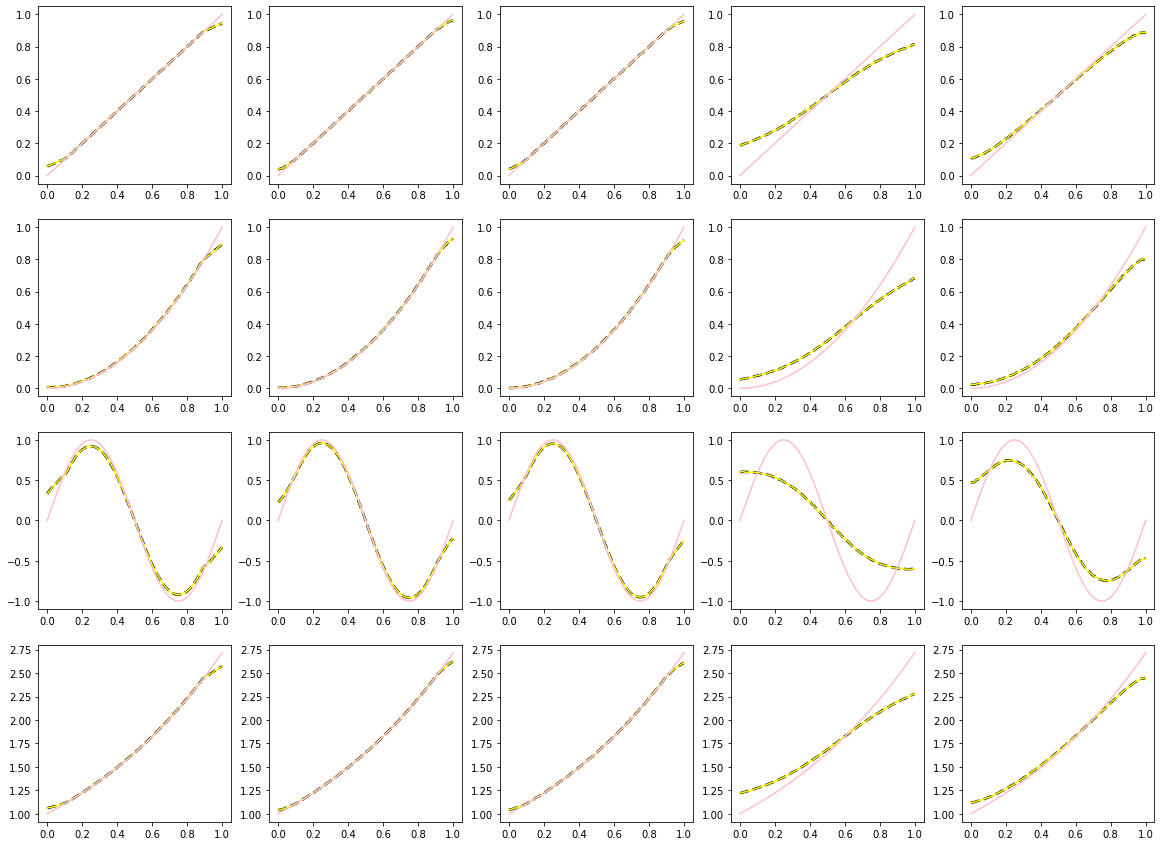

In [73]:
fig=plt.figure()

for i in range(5):
    for j in range(4):
        fig.add_subplot(4,5,i+1+5*j)
        plt.plot(testing_points,NW_subplots[i][j],color='black',linestyle='dashed',linewidth=2.5)
        plt.plot(testing_points,GNW_subplots[i][j],color='yellow')
        plt.plot(testing_points,true_functions[j],color='pink')
        

fig.set_figwidth(20)
fig.set_figheight(15)
plt.show()

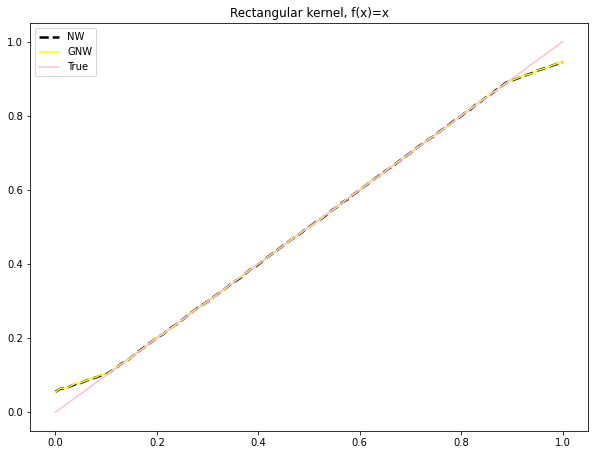

In [75]:
fig_rect_linear=plt.figure()

fig_rect_linear.add_subplot()
plt.plot(testing_points,NW_rect_linear,color='black',label='NW',linestyle='dashed',linewidth=2.5)
plt.plot(testing_points,GNW_rect_linear,color='yellow',label='GNW')
plt.plot(testing_points,true_f_linear,color='pink',label='True')
plt.legend()
plt.title('Rectangular kernel, f(x)=x')

fig_rect_linear.set_figwidth(10)
fig_rect_linear.set_figheight(7.5)fig=plt.figure()

for i in range(5):
    for j in range(4):
        fig.add_subplot(4,5,i+1+5*j)
        plt.plot(testing_points,NW_subplots[i][j],color='black',linestyle='dashed',linewidth=2.5)
        plt.plot(testing_points,GNW_subplots[i][j],color='yellow')
        plt.plot(testing_points,true_functions[j],color='pink')
        

fig.set_figwidth(20)
fig.set_figheight(15)
plt.show()

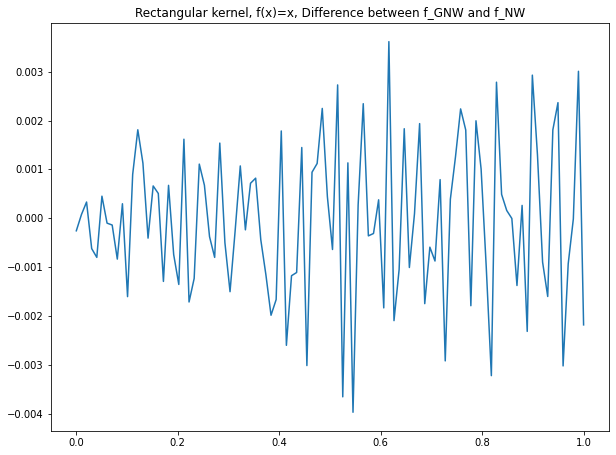

In [77]:
fig_rect_linear_error=plt.figure()

fig_rect_linear.add_subplot()
plt.plot(testing_points,np.array(GNW_gaus_exp)-np.array(NW_gaus_exp))
plt.title('Rectangular kernel, f(x)=x, Difference between f_GNW and f_NW')


fig_rect_linear_error.set_figwidth(10)
fig_rect_linear_error.set_figheight(7.5)

In [86]:
random_testing_points=np.random.uniform(size=20)

true_f_linear=linear(testing_points)
true_f_square=square(testing_points)
true_f_sin=sin_2pi(testing_points)
true_f_exp=exp(testing_points)

functions=[linear,square,sin_2pi,exp]

RNW_rect_linear=[]
RNW_rect_square=[]
RNW_rect_sin=[]
RNW_rect_exp=[]

RGNW_rect_linear=[]
RGNW_rect_square=[]
RGNW_rect_sin=[]
RGNW_rect_exp=[]

RNW_triangular_linear=[]
RNW_triangular_square=[]
RNW_triangular_sin=[]
RNW_triangular_exp=[]

RGNW_triangular_linear=[]
RGNW_triangular_square=[]
RGNW_triangular_sin=[]
RGNW_triangular_exp=[]

RNW_Epanechnikov_linear=[]
RNW_Epanechnikov_square=[]
RNW_Epanechnikov_sin=[]
RNW_Epanechnikov_exp=[]

RGNW_Epanechnikov_linear=[]
RGNW_Epanechnikov_square=[]
RGNW_Epanechnikov_sin=[]
RGNW_Epanechnikov_exp=[]

RNW_gaus_linear=[]
RNW_gaus_square=[]
RNW_gaus_sin=[]
RNW_gaus_exp=[]

RGNW_gaus_linear=[]
RGNW_gaus_square=[]
RGNW_gaus_sin=[]
RGNW_gaus_exp=[]

RNW_lap_linear=[]
RNW_lap_square=[]
RNW_lap_sin=[]
RNW_lap_exp=[]

RGNW_lap_linear=[]
RGNW_lap_square=[]
RGNW_lap_sin=[]
RGNW_lap_exp=[]



In [87]:
# Rectangular kernel

for testing_point in random_testing_points:
    t_0=test0(n=50000,sigma=0.1,kernel=rectangular,width=0.11,x=testing_point,functions=functions)
    
    RNW_rect_linear.append(t_0[0][5])
    RNW_rect_square.append(t_0[1][5])
    RNW_rect_sin.append(t_0[2][5])
    RNW_rect_exp.append(t_0[3][5])
    
    RGNW_rect_linear.append(t_0[0][2])
    RGNW_rect_square.append(t_0[1][2])
    RGNW_rect_sin.append(t_0[2][2])
    RGNW_rect_exp.append(t_0[3][2])

# Triangular kernel    

for testing_point in random_testing_points:
    t_0=test0(n=50000,sigma=0.1,kernel=triangular,width=0.11,x=testing_point,functions=functions)
    
    RNW_triangular_linear.append(t_0[0][5])
    RNW_triangular_square.append(t_0[1][5])
    RNW_triangular_sin.append(t_0[2][5])
    RNW_triangular_exp.append(t_0[3][5])
    
    RGNW_triangular_linear.append(t_0[0][2])
    RGNW_triangular_square.append(t_0[1][2])
    RGNW_triangular_sin.append(t_0[2][2])
    RGNW_triangular_exp.append(t_0[3][2])

# Epanechnikov kernel

for testing_point in random_testing_points:
    t_0=test0(n=50000,sigma=0.1,kernel=Epanechnikov,width=0.11,x=testing_point,functions=functions)
    
    RNW_Epanechnikov_linear.append(t_0[0][5])
    RNW_Epanechnikov_square.append(t_0[1][5])
    RNW_Epanechnikov_sin.append(t_0[2][5])
    RNW_Epanechnikov_exp.append(t_0[3][5])

    RGNW_Epanechnikov_linear.append(t_0[0][2])
    RGNW_Epanechnikov_square.append(t_0[1][2])
    RGNW_Epanechnikov_sin.append(t_0[2][2])
    RGNW_Epanechnikov_exp.append(t_0[3][2])
    
# Gaussian kernel


for testing_point in random_testing_points:
    t_0=test0(n=50000,sigma=0.1,kernel=gaussian,width=0.11,x=testing_point,functions=functions)
    
    RNW_gaus_linear.append(t_0[0][5])
    RNW_gaus_square.append(t_0[1][5])
    RNW_gaus_sin.append(t_0[2][5])
    RNW_gaus_exp.append(t_0[3][5])

    RGNW_gaus_linear.append(t_0[0][2])
    RGNW_gaus_square.append(t_0[1][2])
    RGNW_gaus_sin.append(t_0[2][2])
    RGNW_gaus_exp.append(t_0[3][2])
    
# Laplacian kernel


for testing_point in random_testing_points:
    t_0=test0(n=50000,sigma=0.1,kernel=laplacian,width=0.11,x=testing_point,functions=functions)
    
    RNW_lap_linear.append(t_0[0][5])
    RNW_lap_square.append(t_0[1][5])
    RNW_lap_sin.append(t_0[2][5])
    RNW_lap_exp.append(t_0[3][5])

    RGNW_lap_linear.append(t_0[0][2])
    RGNW_lap_square.append(t_0[1][2])
    RGNW_lap_sin.append(t_0[2][2])
    RGNW_lap_exp.append(t_0[3][2])

    

In [88]:
true_functions=[
true_f_linear,
true_f_square,
true_f_sin,
true_f_exp]





RNW_subplots_rect=[]

RNW_subplots_rect.append(RNW_rect_linear)
RNW_subplots_rect.append(RNW_rect_square)
RNW_subplots_rect.append(RNW_rect_sin)
RNW_subplots_rect.append(RNW_rect_exp)

RNW_subplots_triangular=[]

RNW_subplots_triangular.append(RNW_triangular_linear)
RNW_subplots_triangular.append(RNW_triangular_square)
RNW_subplots_triangular.append(RNW_triangular_sin)
RNW_subplots_triangular.append(RNW_triangular_exp)

RNW_subplots_Epanechnikov=[]

RNW_subplots_Epanechnikov.append(RNW_Epanechnikov_linear)
RNW_subplots_Epanechnikov.append(RNW_Epanechnikov_square)
RNW_subplots_Epanechnikov.append(RNW_Epanechnikov_sin)
RNW_subplots_Epanechnikov.append(RNW_Epanechnikov_exp)

RNW_subplots_gaus=[]

RNW_subplots_gaus.append(RNW_gaus_linear)
RNW_subplots_gaus.append(RNW_gaus_square)
RNW_subplots_gaus.append(RNW_gaus_sin)
RNW_subplots_gaus.append(RNW_gaus_exp)

RNW_subplots_lap=[]

RNW_subplots_lap.append(RNW_lap_linear)
RNW_subplots_lap.append(RNW_lap_square)
RNW_subplots_lap.append(RNW_lap_sin)
RNW_subplots_lap.append(RNW_lap_exp)


#--------------------------------------------------------------------------------------------------------------
RGNW_subplots_rect=[]

RGNW_subplots_rect.append(RGNW_rect_linear)
RGNW_subplots_rect.append(RGNW_rect_square)
RGNW_subplots_rect.append(RGNW_rect_sin)
RGNW_subplots_rect.append(RGNW_rect_exp)

RGNW_subplots_triangular=[]

RGNW_subplots_triangular.append(RGNW_triangular_linear)
RGNW_subplots_triangular.append(RGNW_triangular_square)
RGNW_subplots_triangular.append(RGNW_triangular_sin)
RGNW_subplots_triangular.append(RGNW_triangular_exp)

RGNW_subplots_Epanechnikov=[]

RGNW_subplots_Epanechnikov.append(RGNW_Epanechnikov_linear)
RGNW_subplots_Epanechnikov.append(RGNW_Epanechnikov_square)
RGNW_subplots_Epanechnikov.append(RGNW_Epanechnikov_sin)
RGNW_subplots_Epanechnikov.append(RGNW_Epanechnikov_exp)

RGNW_subplots_gaus=[]

RGNW_subplots_gaus.append(RGNW_gaus_linear)
RGNW_subplots_gaus.append(RGNW_gaus_square)
RGNW_subplots_gaus.append(RGNW_gaus_sin)
RGNW_subplots_gaus.append(RGNW_gaus_exp)

RGNW_subplots_lap=[]

RGNW_subplots_lap.append(RGNW_lap_linear)
RGNW_subplots_lap.append(RGNW_lap_square)
RGNW_subplots_lap.append(RGNW_lap_sin)
RGNW_subplots_lap.append(RGNW_lap_exp)

#--------------------------------------------------------------------------------------------------------------------

RNW_subplots=[]

RNW_subplots.append(RNW_subplots_rect)
RNW_subplots.append(RNW_subplots_triangular)
RNW_subplots.append(RNW_subplots_Epanechnikov)
RNW_subplots.append(RNW_subplots_gaus)
RNW_subplots.append(RNW_subplots_lap)


RGNW_subplots=[]

RGNW_subplots.append(RGNW_subplots_rect)
RGNW_subplots.append(RGNW_subplots_triangular)
RGNW_subplots.append(RGNW_subplots_Epanechnikov)
RGNW_subplots.append(RGNW_subplots_gaus)
RGNW_subplots.append(RGNW_subplots_lap)

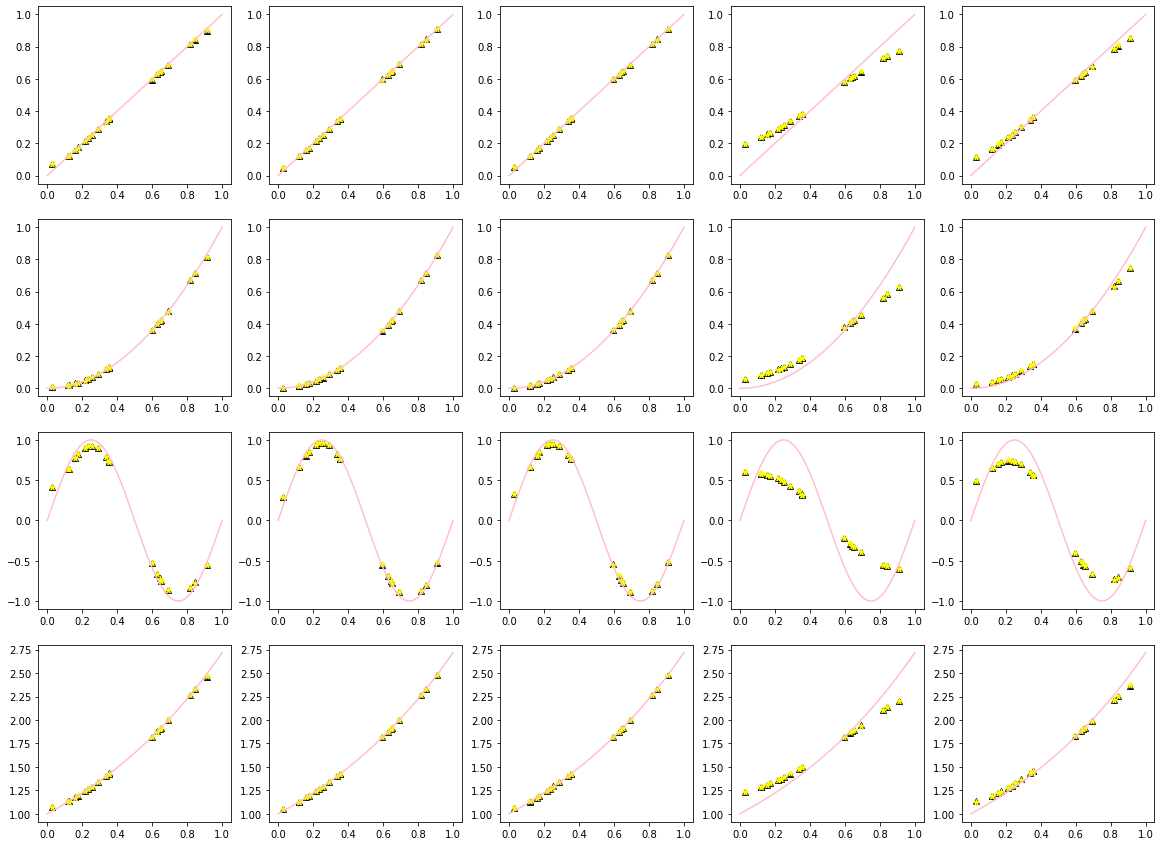

In [91]:
fig=plt.figure()

for i in range(5):
    for j in range(4):
        fig.add_subplot(4,5,i+1+5*j)
        plt.scatter(random_testing_points,RNW_subplots[i][j],color='black',marker='^',alpha=0.9)
        plt.scatter(random_testing_points,RGNW_subplots[i][j],color='yellow',marker='*')
        plt.plot(testing_points,true_functions[j],color='pink')
        

fig.set_figwidth(20)
fig.set_figheight(15)
plt.show()

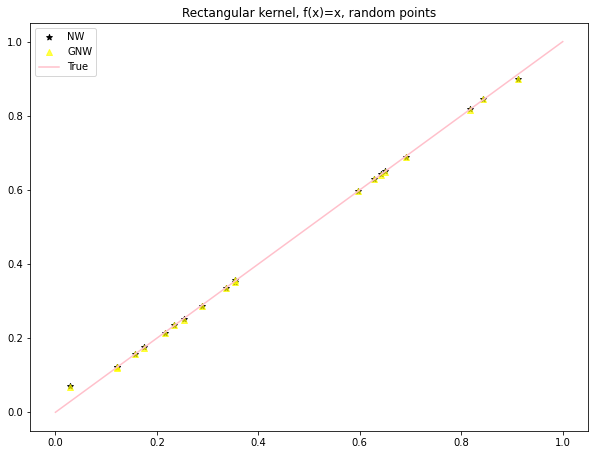

In [100]:
r_fig_rect_linear=plt.figure()

r_fig_rect_linear.add_subplot()
plt.scatter(random_testing_points,RNW_rect_linear,color='black',label='NW',marker='*',alpha=1)
plt.scatter(random_testing_points,RGNW_rect_linear,color='yellow',label='GNW',marker='^',alpha=0.7)
plt.plot(testing_points,true_f_linear,color='pink',label='True')
plt.legend()
plt.title('Rectangular kernel, f(x)=x, random points')

r_fig_rect_linear.set_figwidth(10)
r_fig_rect_linear.set_figheight(7.5)

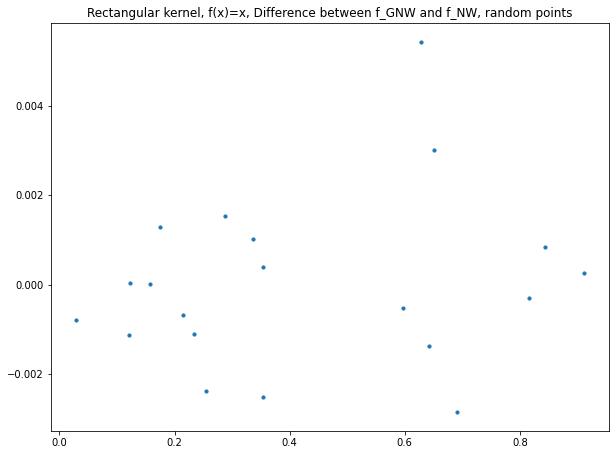

In [107]:
fig_rect_linear_error=plt.figure()

fig_rect_linear.add_subplot()
plt.scatter(random_testing_points,np.array(RGNW_gaus_exp)-np.array(RNW_gaus_exp),s=10)
plt.title('Rectangular kernel, f(x)=x, Difference between f_GNW and f_NW, random points')


fig_rect_linear_error.set_figwidth(10)
fig_rect_linear_error.set_figheight(7.5)